# Tutorial for anomaly detection with AR and PCA

### Imports

In [2]:
import numpy as np


import SynthData
from utils import *
from PCA_AR import *

### Selecting data
At first we need to select data. The time series must be a numpy array of shape (d,n) where n is the length of the series and d the number of dimensions 

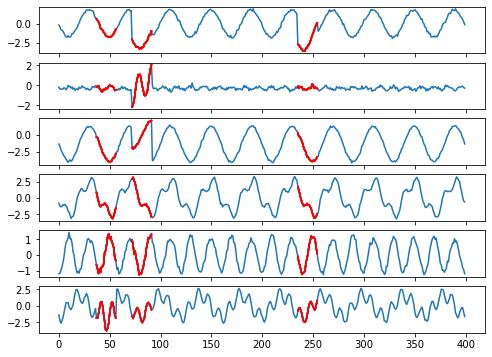

anomalies : [ 37 235  72]


In [3]:
rng = np.random.RandomState(1)
n_samples=400
data = SynthData.MultipleUnknownSig(nb_ano=3,nb_ano_series=3, nb_dim=6, where=-1, type_ano='contextual', n_samples=n_samples, sigma_noise=0.1, ano_size=20, different_freq=False, rng = rng)
X = data.S

#plot the series 
plot_series(X, motifs_times = data.where, window_size=20)

print('anomalies :', data.where )

### Getting the sum of the square of residuals
After the PCA, we reconstruct the signal and fit an AR models. From the result we can compute residuals. Those residuals are assumed to be gaussian, so the sum of the square of residuals is a chi2. Thus, we compute this sum. High values compared to chi2 quantiles are anomalies 

Text(0.5, 1.0, 'Squared residuals')

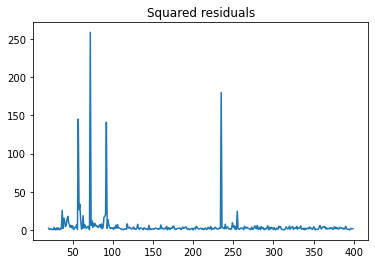

In [4]:
square_res, k = sum_square_resids_PCA_AR(X, 0.95, 20)
plt.plot(np.arange(20,400), square_res)
plt.title('Squared residuals')


We compare the histogram of the values of the residuals to the chi2 density to see to important values

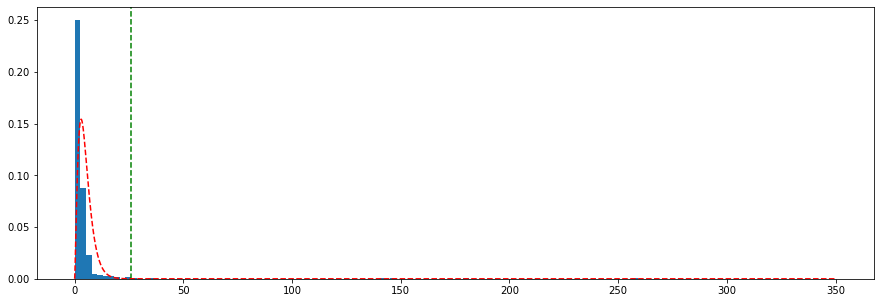

In [5]:
plot_hist_resids_chi2(square_res, k)

### Finding anomalies

We find all points which value is greater than a given quantile (here 0.99) of the chi2 density of order k where k is the number of dimensions kept after PCA.

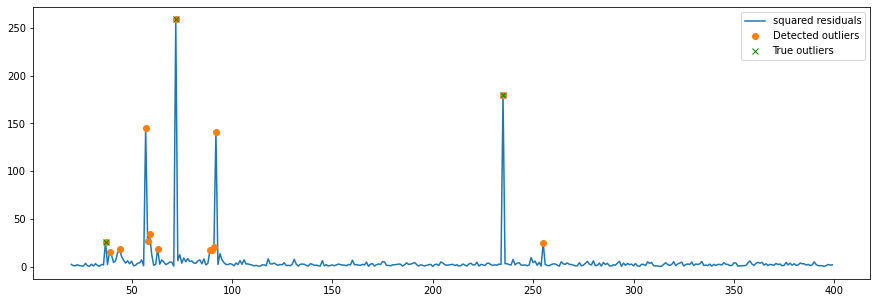

In [6]:
ano = all_anomalous_points(square_res, k, quantile = 0.99 )
plot_anomalous_points(square_res,ano, data.where, order=20)

Now we keep only biggest anomalies and reject the ones too close (distance is less than order) 

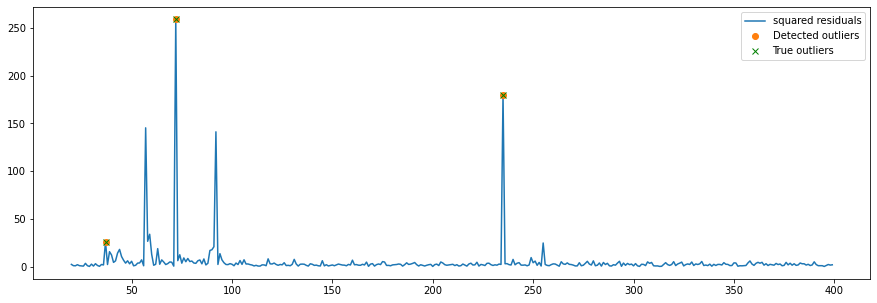

In [7]:
anos, sc = find_anomalies_order(X, 0.95, 20, 0.99)
plot_anomalous_points(square_res,anos, data.where, order=20)

### Scoring the detection

In [8]:
TP, FN, FP, precision, recall = score(anos, data.where, 20)
print('precision=', precision, ' recall = ', recall)

precision= 1.0  recall =  1.0
